In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [107]:
df = pd.read_csv('migrations.csv', na_values=None)
df_copy = migration_df.copy()

In [108]:
df.head(2)

,Year,Country,Resettled by destination per capita,Child migrants (UNICEF),Child migrants (under-20s),Asylum seekers by origin (per capita),Child migrants per capita (under-20s),Refugees by destination.1,Internal displacement (disasters),Annual internal displacements (Disaster),...,Internal displacement (conflict),Asylum seekers by destination (per capita),Resettled arrivals by origin (per capita),Annual internal displacement from disaster (%),Child migrants (UNDESA),Child migrants per capita (UNDESA),Net migration,Remittances cost (from),International emigrants (% population),Refugees by destination (per capita).1
0,1955,Central and Southern Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,525786.0,NaN,NaN,NaN
1,1960,Central and Southern Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,809851.0,NaN,NaN,NaN


# Migration Data Analysis Objectives and Tasks

## Dataset Description
The dataset contains migration-related information across different countries and years. Below are the columns included in the dataset:

- **Year**: Year of observation.
- **Country**: Country name.
- **Various migration metrics**: These include resettlement statistics, asylum seekers, refugees, internal displacement due to disasters or conflicts, emigrants, remittances, etc.

## Objectives

### 1. Trend Analysis
   - Identify overall trends in migration metrics over time (e.g., using line plots).
   - Analyze the direction and magnitude of changes in migratigration data.
   - Determine whether there are any significant outliers or anomalies in migration trends.

### 2. Comparison Across Countries
   - Rank countries by various migration metrics (e.g., net migration, emigration rates).
   - Visualize geographic patterns of migration using maps.
   - Compare migration patterns between different regions or continents.
   - Identify countries that are major sources of migrants versus those that are major destinations.
   
### 3. Impact of Events
   - Correlate migration data with historical events (e.g., conflicts, natural disasters).
   - Analyze how migration patterns change in response to specific events.
   - Identify regions or countries that are particularly affected by certain types of events.
   - Determine the lagged effects of events on migration flows.

### 4. Demographic Analysis
   - Calculate age distribution statistics for migrants (e.g., mean age, age range).
   - Compare the age distribution of migrants across different countries or regions.
   - Analyze gender differences in migration patterns (e.g., male vs. female migrants).
   - Investigate whether there are differences in migration patterns for different demographic groups (e.g., children, elderly).

### 5. Economic Analysis
   - Calculate correlations between economic indicators (e.g., GDP, unemployment rate) and migration metrics.
   - Analyze the relationship between remittances and migration flows.
   - Identify countries or regions that attract migrants for economic reasons.
   - Investigate whether economic downturns in certain countries lead to increased emigration.

### 6. Policy Evaluation
   - Analyze how changes in immigration policies correlate with migration trends.
   - Assess the impact of refugee resettlement programs on migration flows.
   - Compare migration patterns before and after the implementation of specific policies.
   - Identify unintended consequences of migration policies.

### 7. Forecasting
   - Apply time series analysis techniques (e.g., ARIMA, exponential smoothing) to historical migration data.
   - Evaluate the accuracy of different forecasting models using historical data.
   - Generate forecasts of future migration trends based on past patterns.
   - Assess the uncertainty associated with migration forecasts and identify potential risks or limitations.


## Cleaning Data

#### Filling NaN values with 0

In [109]:
df = df.fillna(0)

# <center>Objectives</center>

### 1. Trend Analysis
   - Identify overall trends in migration metrics over time (e.g., using line plots).

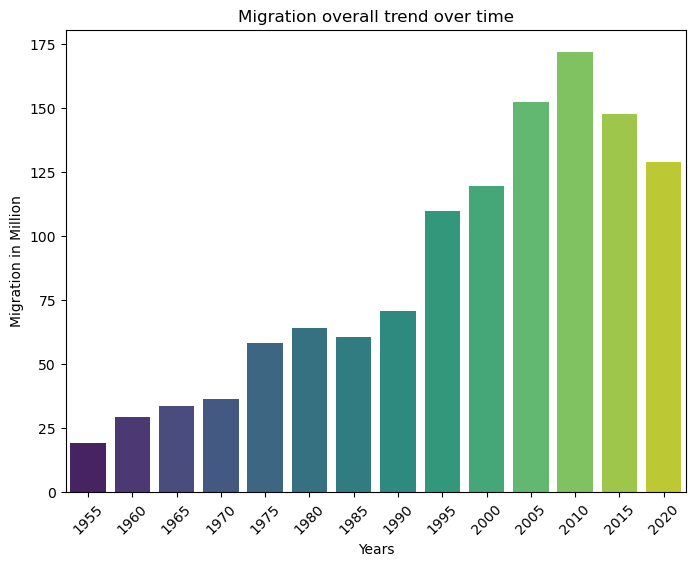

In [110]:
overal_trend_migration_metrics_by_year = df[df['Net migration'] > 0].groupby('Year')['Net migration'].sum()
plt.figure(figsize=(8,6))
sns.barplot(x=overal_trend_migration_metrics_by_year.index,
            y=overal_trend_migration_metrics_by_year.values / 10**6,
            palette='viridis')
plt.title('Migration overall trend over time')
plt.xlabel('Years')
plt.ylabel('Migration in Million')
plt.xticks(rotation=45)
plt.show()

### 1. Trend Analysis
   - Analyze the direction and magnitude of changes in migration patterns.

### Explanation of Data Visualization

#### Graph Interpretation: Migration Trend Change Over Time

The graph illustrates the annual percentage change in migration trends over the years. Each bar represents a specific year, and its height indicates the percentage change in migration compared to the previous year.

- Positive Values: Bars extending to the right indicate an increase in migration compared to the previous year.
- Negative Values: Bars extending to the left indicate a decrease in migration compared to the previous year.
- The color of the bars (blue for positive changes, red for negative changes) further enhances the visual representation.

For example:
- The bar for the year 1960 extends to the right, indicating a positive migration trend with a percentage change of approximately 54.33% compared to 1955.
- Conversely, the bar for the year 2015 extends to the left, indicating a negative migration trend with a percentage change of approximately -14.22% compared to 2010.

#### Overall Trend: Cumulative Change in Migration

The line plot accompanying the bar chart shows the cumulative change in migration trends over the years. Each point on the line represents a specific year, and its position along the y-axis indicates the cumulative percentage change in migration compared to the initial year (1955).

- The upward trend of the line indicates an overall increase in migration over the years, while a downward trend indicates an overall decrease.
- The slope of the line provides insights into the magnitude and direction of migration changes over time.
- The line intersects the y-axis at the initial year (1955), representing the baseline or starting point for the cumulative change in migration.

For instance:
- The line reaches its peak around the year 2010, indicating the highest cumulative change in migration compared to 1955.
- Conversely, the line declines towards the end of the plot, suggesting a decrease in migration trends in recent years compared to the initial period.

### Conclusion
- By visually analyzing the graph, we can identify patterns and trends in migration changes over time.
- The combination of bar and line plots offers a comprehensive view of both annual fluctuations and long-term trends in migration patterns.
- This visualization facilitates the interpretation of complex migration data, enabling stakeholders to make informed decisions and policies.
rmed decisions and policies.


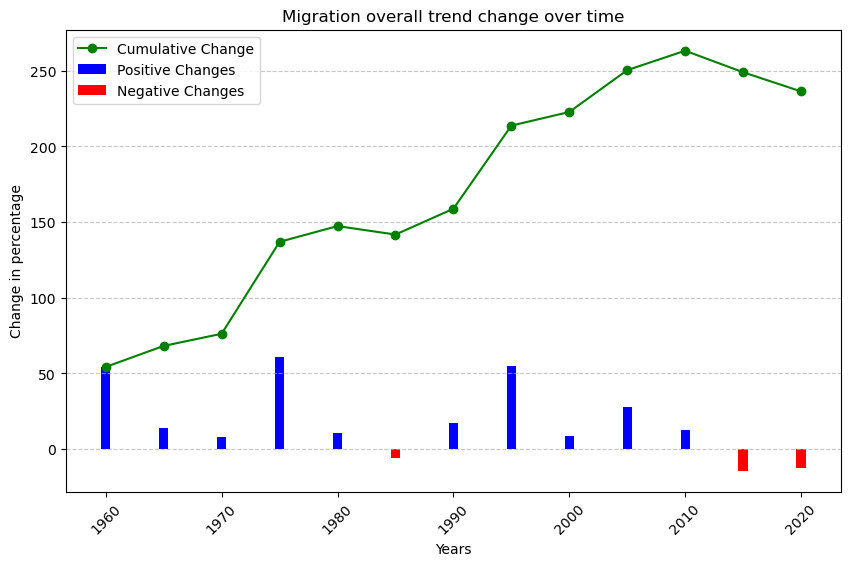

In [111]:
overal_migration_trend_change_over_years = overal_trend_migration_metrics_by_year.pct_change() * 100
cumulative_changes = overal_migration_trend_change_over_years.cumsum()
plt.figure(figsize=(10, 6))
plt.bar(overal_migration_trend_change_over_years.index[positive_mask],
        overal_migration_trend_change_over_years[positive_mask],
        color='blue', label='Positive Changes')
plt.bar(overal_migration_trend_change_over_years.index[~positive_mask],
        overal_migration_trend_change_over_years[~positive_mask],
        color='red', label='Negative Changes')
plt.plot(cumulative_changes, marker='o', color='green', linestyle='-', label='Cumulative Change')
plt.title('Migration overall trend change over time')
plt.xlabel('Years')
plt.ylabel('Change in percentage')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

### 1. Trend Analysis
   - Determine whether there are any significant outliers or anomalies in migration trends.